In [1]:
#Importing all the required libraries
import pandas as pd                    # data processing
import numpy as np                     # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore") 

# Machine learning libraries
from sklearn.model_selection import train_test_split
# split test and train data
from sklearn.model_selection import KFold,cross_val_score,cross_val_predict
# K Fold cross validation 
from sklearn import metrics
# metrics will be use later to get a accuracy score 

# Prediction algoritms that I will use in this study 
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
cd F:\

F:\


In [3]:
data_set = pd.read_csv(r'C:\Users\devanshu pc\Desktop\ee551.csv')
print(data_set)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [4]:
data_set

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
data_set.head(8)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN


In [6]:
data_set.tail(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [7]:
data_set.sample(n=10) #Getting a sample of random 10 rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
80,861103,B,11.45,20.97,73.81,401.5,0.11020,0.09362,0.045910,0.022330,...,32.16,84.53,525.1,0.15570,0.16760,0.17550,0.06127,0.2762,0.08851,NaN
334,897374,B,12.30,19.02,77.88,464.4,0.08313,0.04202,0.007756,0.008535,...,28.46,84.53,544.3,0.12220,0.09052,0.03619,0.03983,0.2554,0.07207,NaN
455,9112085,B,13.38,30.72,86.34,557.2,0.09245,0.07426,0.028190,0.032640,...,41.61,96.69,705.6,0.11720,0.14210,0.07003,0.07763,0.2196,0.07675,NaN
28,852973,M,15.30,25.27,102.40,732.4,0.10820,0.16970,0.168300,0.087510,...,36.71,149.30,1269.0,0.16410,0.61100,0.63350,0.20240,0.4027,0.09876,NaN
263,889403,M,15.61,19.38,100.00,758.6,0.07840,0.05616,0.042090,0.028470,...,31.67,115.90,988.6,0.10840,0.18070,0.22600,0.08568,0.2683,0.06829,NaN
112,86409,B,14.26,19.65,97.83,629.9,0.07837,0.22330,0.300300,0.077980,...,23.73,107.00,709.0,0.08949,0.41930,0.67830,0.15050,0.2398,0.10820,NaN
388,903011,B,11.27,15.50,73.38,392.0,0.08365,0.11140,0.100700,0.027570,...,18.93,79.73,450.0,0.11020,0.28090,0.30210,0.08272,0.2157,0.10430,NaN
495,914333,B,14.87,20.21,96.12,680.9,0.09587,0.08345,0.068240,0.049510,...,28.48,103.90,783.6,0.12160,0.13880,0.17000,0.10170,0.2369,0.06599,NaN
230,881972,M,17.05,19.08,113.40,895.0,0.11410,0.15720,0.191000,0.109000,...,24.89,133.50,1189.0,0.17030,0.39340,0.50180,0.25430,0.3109,0.09061,NaN
328,8953902,M,16.27,20.71,106.90,813.7,0.11690,0.13190,0.147800,0.084880,...,30.38,129.80,1121.0,0.15900,0.29470,0.35970,0.15830,0.3103,0.08200,NaN


In [8]:
data_set.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [9]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
#'id' and 'Unnamed: 32' are irrelevant so we will drop them
data_set.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [11]:
data_set.shape

(569, 31)

In [12]:
data_set.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [13]:
#Both isna() & isnull() are used to find null values.
#data_set.isna().sum()
data_set.isnull().sum()


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

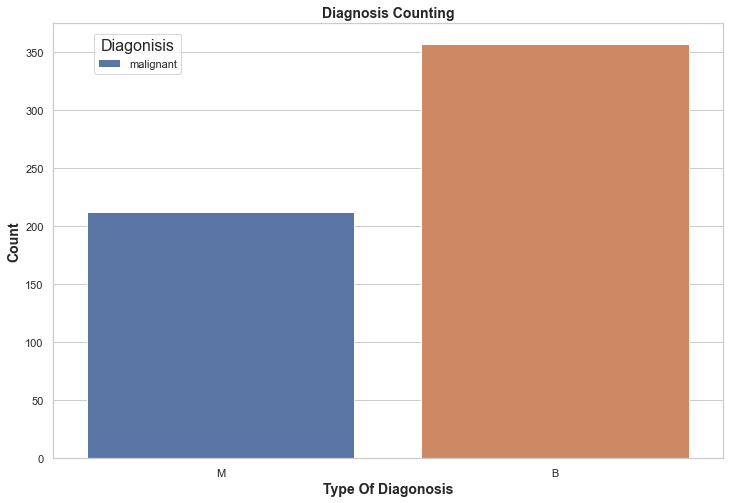

In [14]:
#countplot
plt.subplots(figsize=(12,8))
sns.countplot(data=data_set,x='diagnosis');

plt.title('Diagnosis counting'.title(),
         fontsize = 14, weight="bold")

plt.xlabel('Type of diagonosis'.title(),
          fontsize=14,weight="bold")

plt.ylabel('Count'.title(),
           fontsize=14,weight="bold")

plt.legend(['malignant','benign'],loc='center right',bbox_to_anchor=(0.2, 0.93), 
           title="Diagonisis", title_fontsize = 16);

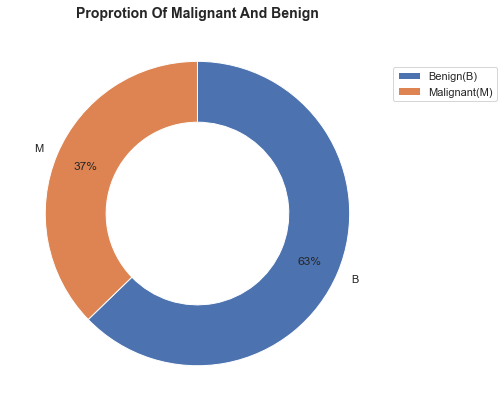

In [15]:
#pie chart  

plt.figure(figsize=(15,7))
sorted_counts = data_set['diagnosis'].value_counts()
# count the value of diagnosis 
ax=plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False,pctdistance=0.8 ,wedgeprops = {'width' : 0.4}, autopct='%1.0f%%');


plt.title('Proprotion of malignant and benign'.title(),
         fontsize = 14, weight="bold");

plt.legend(['Benign(B)','Malignant(M)'],bbox_to_anchor=(1,0.9));


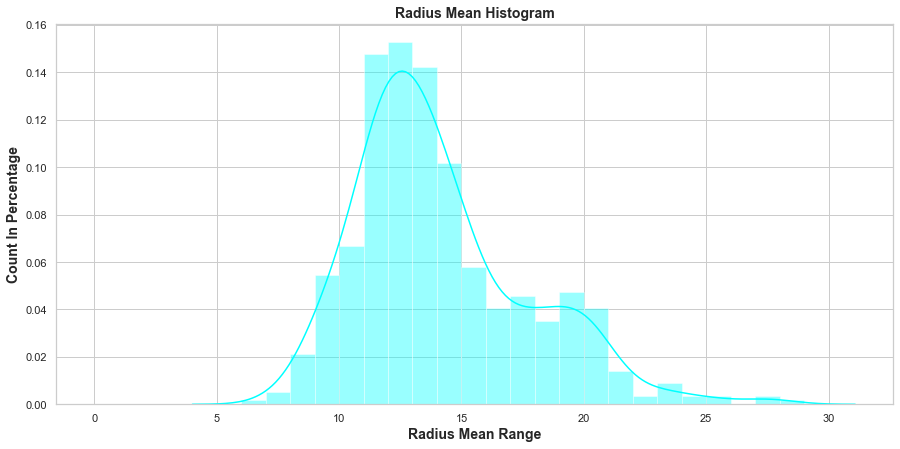

In [16]:
#distplot = histogram + curveline 
# for example : radius mean

plt.subplots(figsize=(15,7))
x = data_set.radius_mean
bins = np.arange(0,30,1)
sns.distplot(x,bins=bins,color='cyan')

#ax.set_yticklabels([], minor = True);


plt.title('radius mean Histogram'.title(),
         fontsize = 14, weight="bold")

plt.xlabel('radius mean range'.title(),
          fontsize=14,weight="bold")

plt.ylabel('Count in percentage'.title(),
           fontsize=14,weight="bold");


In [17]:
# split table into different valriables 
y=data_set.diagnosis 
x = data_set.iloc[:,1:] 

# standardization
std = (x - x.mean()) / (x.std())       

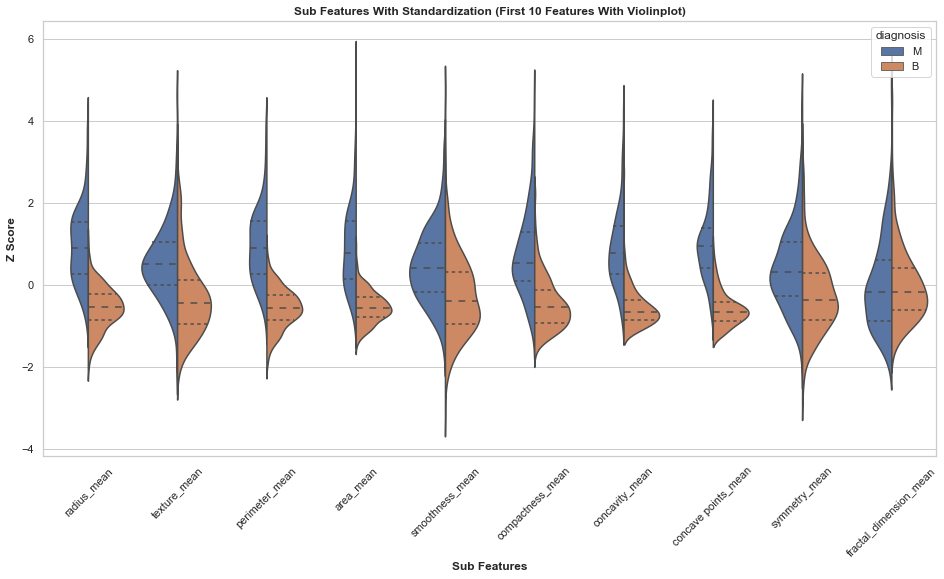

In [18]:
data = pd.concat([y,std.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')


plt.figure(figsize=(16,8))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")


plt.title('Sub features with standardization (first 10 features with violinplot)'.title(),
         fontsize = 12, weight="bold")

plt.xlabel('Sub features'.title(),
          fontsize=12,weight="bold")

plt.ylabel('z score'.title(),
           fontsize=12,weight="bold");

plt.xticks(rotation=45);

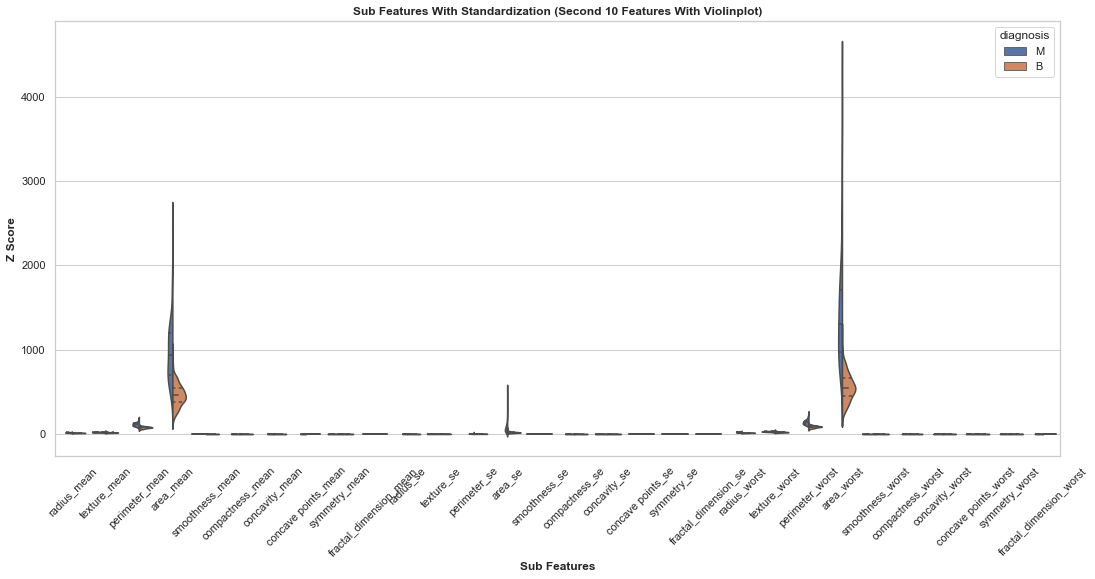

In [19]:
data = pd.melt(data_set,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')




plt.figure(figsize=(18,8))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")


plt.title('Sub features with standardization (Second 10 features with violinplot)'.title(),
         fontsize = 12, weight="bold")

plt.xlabel('Sub features'.title(),
          fontsize=12,weight="bold")

plt.ylabel('z score'.title(),
           fontsize=12,weight="bold");
plt.xticks(rotation=45);

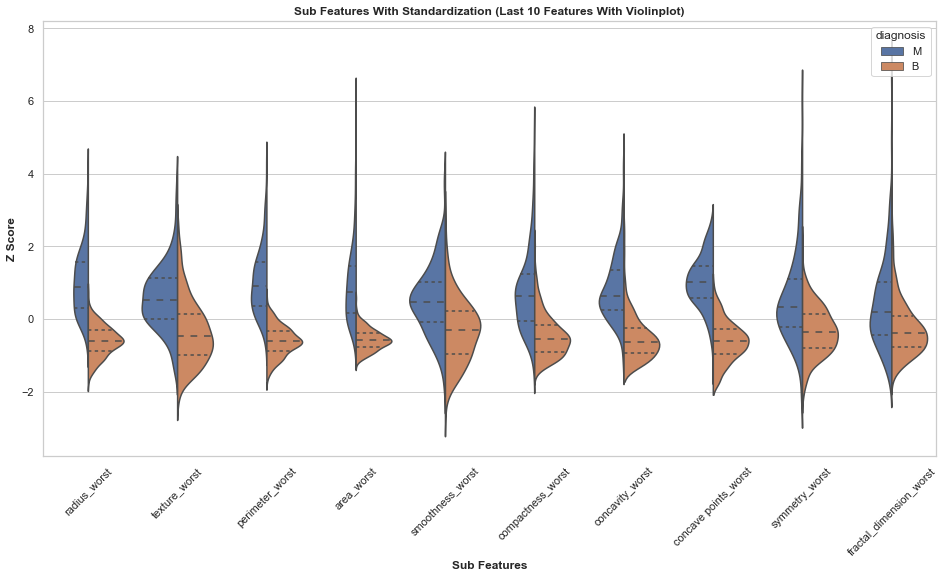

In [20]:
data = pd.concat([y,std.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')



plt.figure(figsize=(16,8))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")


plt.title('Sub features with standardization (last 10 features with violinplot)'.title(),
         fontsize = 12, weight="bold")

plt.xlabel('Sub features'.title(),
          fontsize=12,weight="bold")

plt.ylabel('z score'.title(),
           fontsize=12,weight="bold");

plt.xticks(rotation=45);

In [21]:
data_new = pd.concat([y,std],axis=1)


# y=df.diagnosis 
# x = data_set.iloc[:,1:]  and std = (x - x.mean()) / (x.std())  

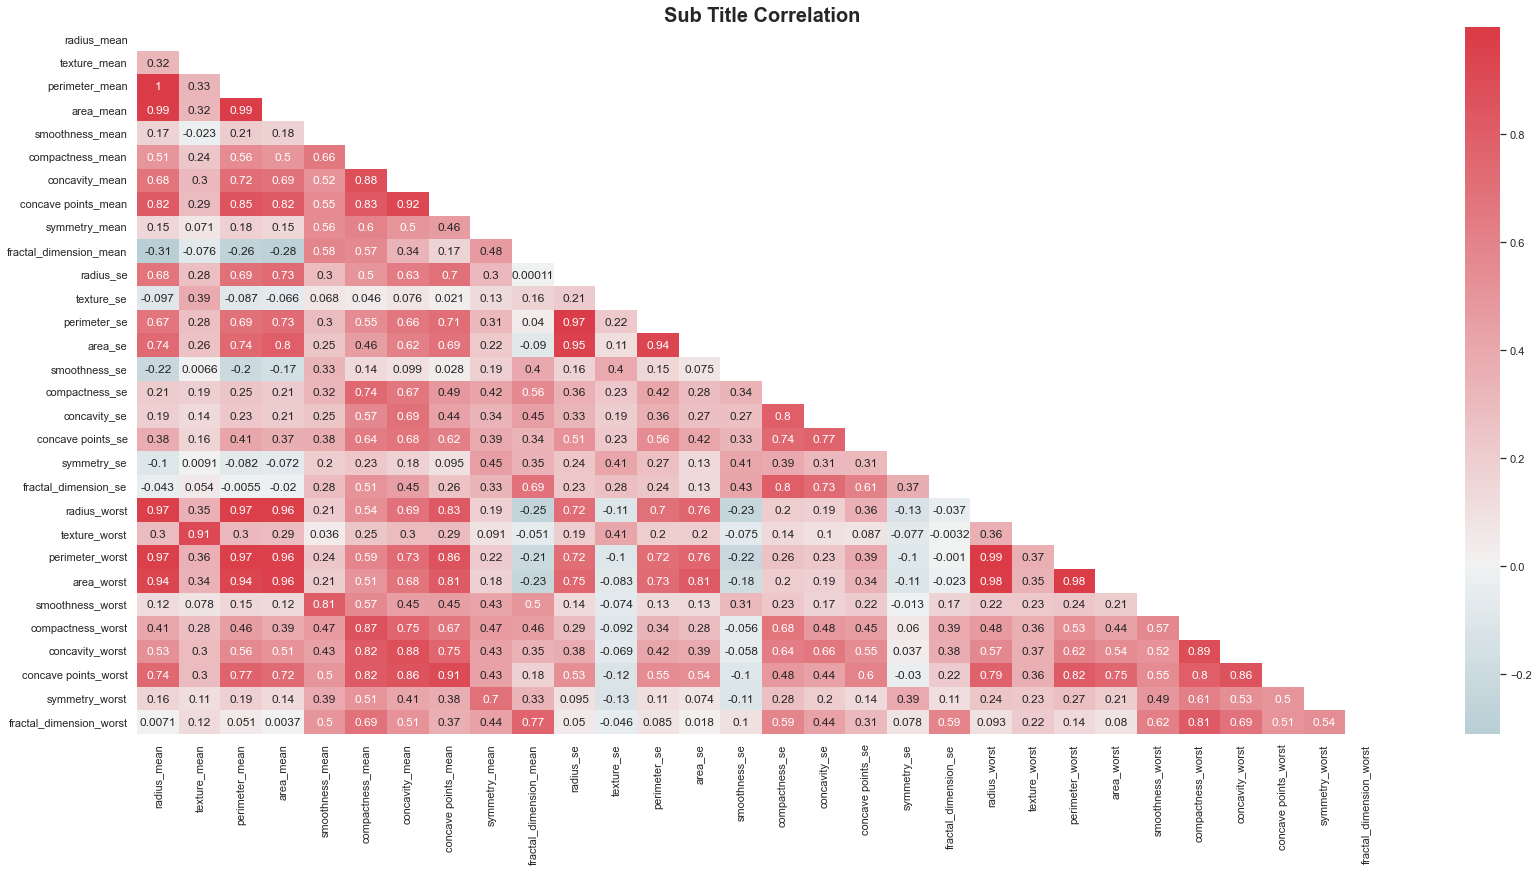

In [22]:
# scatterplot with 2 high related sub features. Addtionally diagnosis will be used as a hue of different type of tumors
# Before we're going to plot scatter we'll find out which sub features are related together strongly 
# For that we will use pearson corrla

plt.figure(figsize=(28,13))
c= data_new.corr()
mask = np.triu(np.ones_like(c, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True) 
# color choose
sns.heatmap(c,cmap=cmap,mask=mask,center=0,annot=True);


plt.title('Sub title correlation'.title(),
         fontsize=20,weight='bold');

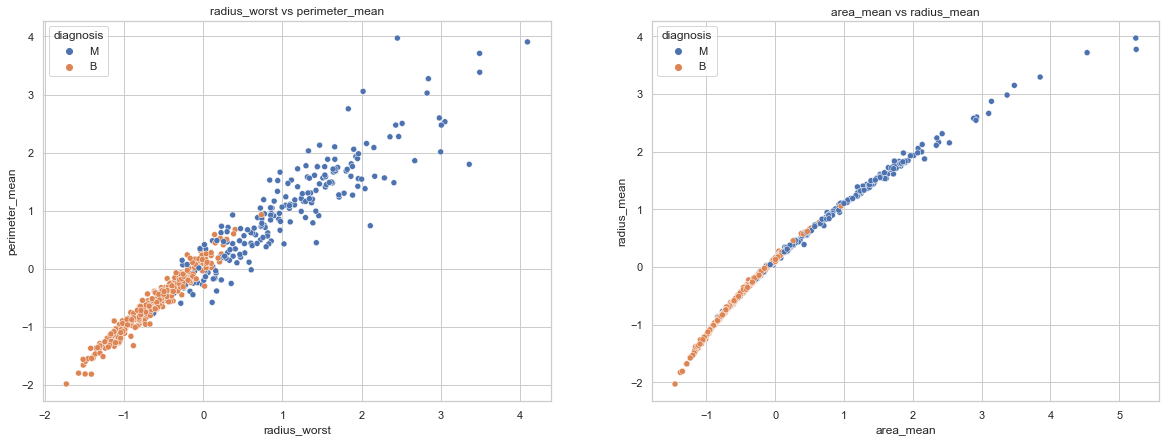

In [23]:
f,ax = plt.subplots(1,2,figsize=(20,7))

sns.scatterplot(data=data_new,x='radius_worst',y='perimeter_mean',hue='diagnosis',x_jitter=0.04,ax=ax[0])
ax[0].set_title('radius_worst vs perimeter_mean')
sns.scatterplot(data=data_new,x='area_mean',y='radius_mean',hue='diagnosis',x_jitter=0.04,ax=ax[1])
ax[1].set_title('area_mean vs radius_mean');

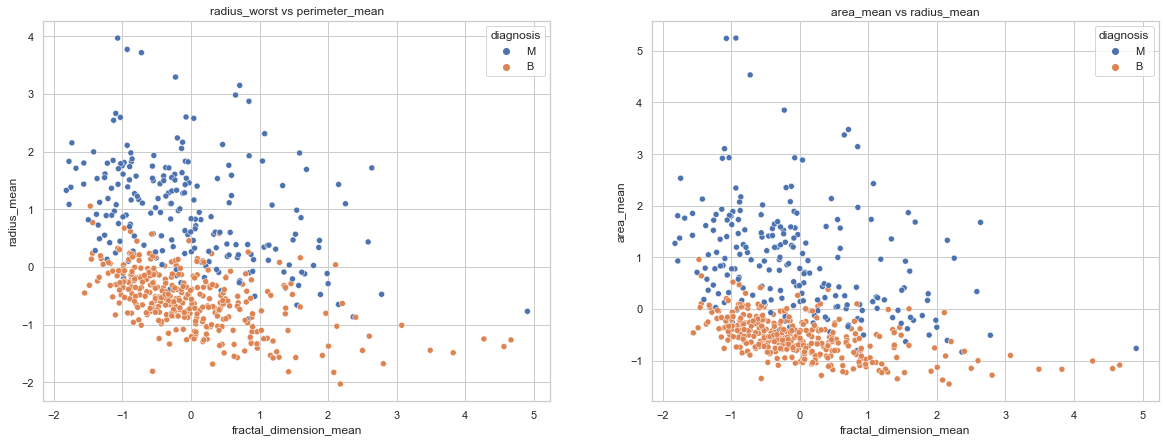

In [24]:
f,ax = plt.subplots(1,2,figsize=(20,7))

sns.scatterplot(data=data_new,x='fractal_dimension_mean',y='radius_mean',hue='diagnosis',x_jitter=0.04,ax=ax[0])
ax[0].set_title('radius_worst vs perimeter_mean')
sns.scatterplot(data=data_new,x='fractal_dimension_mean',y='area_mean',hue='diagnosis',x_jitter=0.04,ax=ax[1])
ax[1].set_title('area_mean vs radius_mean');

In [25]:
train,test = train_test_split(data_set,test_size=0.2,random_state=2019)

# test size =0.2 means I will use 20% for testing and 80% for training 
# Spliting test-set and training-set is very important.Because we have to use testdata to examine our prediction model and get a performance in numeric value.
# So never use testdata for training.Otherwise we can't get a exact result of prediction model.
# Reason why we use random_state : https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn

x_train = train.drop(['diagnosis'],axis=1)
y_train = train.diagnosis

# we should think about why we drop diagonosis column.Because we want to know the diagnosis in the end (That mean malignant or benign)
# We're going to use other columns as a x variable to get a diagonosis(y variable).That's the reason why we drop diagnosis in x_train and x_test

x_test = test.drop(['diagnosis'],axis=1)
y_test = test.diagnosis 

print(len(train),len(test))

455 114


In [26]:
model = svm.SVC(gamma='scale')
model.fit(x_train,y_train)
# learning train dataset

y_pred = model.predict(x_test)
# prediction test dataset

print('SVM: %.2f' % (metrics.accuracy_score(y_pred,y_test)*100))
# metrics.accuracy_score : measure the accurace_score
# so we compare prediction of y (prediction, y_pred) and test result of y (fact,y_test) how close our y_pred to y_test

SVM: 91.23


In [27]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print('DecisionTreeClassifier: %.2f' % (metrics.accuracy_score(y_pred,y_test)*100))

DecisionTreeClassifier: 90.35


In [28]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print('KNeighborsClassifier: %.2f' % (metrics.accuracy_score(y_pred,y_test)*100))

KNeighborsClassifier: 92.98


In [29]:
model = LogisticRegression(solver='lbfgs',max_iter=2000)
# about parameters: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print('LogisticRegression: %.2f' % (metrics.accuracy_score(y_pred,y_test)*100))

LogisticRegression: 94.74


In [30]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print('RandomForestClassifier: %.2f' % (metrics.accuracy_score(y_pred,y_test)*100))

RandomForestClassifier: 93.86


In [31]:
features = pd.Series(
     model.feature_importances_,
    index=x_train.columns).sort_values(ascending=False)

# model.feature_importances_ shows which paramet is important to predict the model 
# we are matching train dataset columns with model.feature_importances and saved in pandas series as a numeric values 
print(features)

concave points_mean        0.133268
perimeter_worst            0.133137
concave points_worst       0.127491
radius_worst               0.118579
area_worst                 0.088250
perimeter_mean             0.060501
area_mean                  0.049088
concavity_mean             0.047210
radius_mean                0.040326
concavity_worst            0.039200
area_se                    0.024526
radius_se                  0.022129
perimeter_se               0.016599
texture_mean               0.013375
compactness_mean           0.008554
texture_worst              0.008545
compactness_worst          0.008312
smoothness_mean            0.007260
symmetry_worst             0.006909
fractal_dimension_worst    0.006078
smoothness_worst           0.006002
concavity_se               0.005206
smoothness_se              0.005129
symmetry_se                0.003921
concave points_se          0.003732
compactness_se             0.003495
fractal_dimension_se       0.003447
texture_se                 0

In [32]:
### Extract Top 5 Features
top_5_features = features.keys()[:5]
# series.keys() : this function is an alias for index. It returns the index labels of the given series object.

print(top_5_features)

Index(['concave points_mean', 'perimeter_worst', 'concave points_worst',
       'radius_worst', 'area_worst'],
      dtype='object')


In [33]:
model = svm.SVC(gamma='scale')
model.fit(x_train[top_5_features],y_train)

y_pred = model.predict(x_test[top_5_features])
# prediction test dataset

print('SVM(Top5): %.2f' % (metrics.accuracy_score(y_pred,y_test)*100))

SVM(Top5): 91.23


In [34]:
model = svm.SVC(gamma='scale')

cv = KFold(n_splits=5,random_state=None)
# Interation : K=5

accs = []

for train_index,test_index in cv.split(data_set[top_5_features]):
    x_train = data_set.iloc[train_index][top_5_features]
    y_train = data_set.iloc[train_index].diagnosis
    
    x_test = data_set.iloc[test_index][top_5_features]
    y_test = data_set.iloc[test_index].diagnosis
    
    
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accs.append(metrics.accuracy_score(y_pred,y_test))
    # position of y_pred and y_test are not important
    
print(accs)

[0.7807017543859649, 0.8947368421052632, 0.9736842105263158, 0.9298245614035088, 0.9380530973451328]


In [35]:
# cross_vall_score : apply cross validation (in our case would be KFold) and learning.
# In the end will be print out the model score
# x variable : data_set[top_5_features] , y variable : di.diagnosis

model = svm.SVC(gamma='scale')
cv = KFold(n_splits=5,random_state=None)

accs = cross_val_score(model,data_set[top_5_features],data_set.diagnosis,cv=cv)
print(accs)

[0.78070175 0.89473684 0.97368421 0.92982456 0.9380531 ]


In [36]:
model = {
    'SVM': svm.SVC(gamma='scale'),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs',max_iter=2000),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100)
    
}

cv = KFold(n_splits=5,random_state=None)

for name, model in model.items():
    scores = cross_val_score(model,data_set[top_5_features],data_set.diagnosis,cv=cv)
    
    print('%s:%.2f%%' % (name,np.mean(scores)*100))

SVM:90.34%
DecisionTreeClassifier:90.33%
KNeighborsClassifier:88.40%
LogisticRegression:90.69%
RandomForestClassifier:93.50%


In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
# scale the range between 0 and 1 
scaled_data = scaler.fit_transform(data_set[top_5_features])

model = {
    'SVM': svm.SVC(gamma='scale'),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs',max_iter=2000),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100)
    
}

cv = KFold(n_splits=5,random_state=None)

for name, model in model.items():
    scores = cross_val_score(model,scaled_data,data_set.diagnosis,cv=cv)
    
    print('%s:%.2f%%' % (name,np.mean(scores)*100))

SVM:93.85%
DecisionTreeClassifier:91.38%
KNeighborsClassifier:93.15%
LogisticRegression:93.85%
RandomForestClassifier:93.15%


In [38]:
# First we will have a new table which contains only feature mean 
features_mean = list(data_set.columns[1:11])

# And then change diagnosis name
data_set['diagnosis']=data_set['diagnosis'].map({'M':0,'B':1})

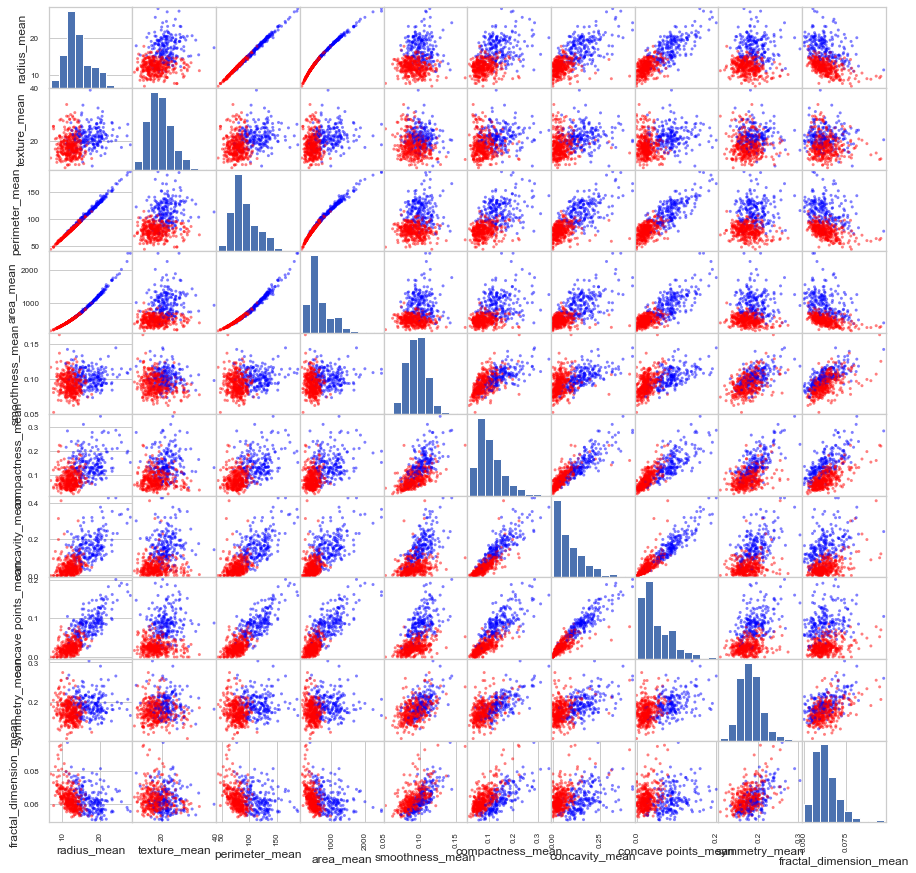

In [39]:
from pandas.plotting import scatter_matrix

color_function = {0: "blue", 1: "red"} 
colors = data_set["diagnosis"].map(lambda x: color_function.get(x))
# mapping the color fuction with diagnosis column
pd.plotting.scatter_matrix(data_set[features_mean], c=colors, alpha = 0.5, figsize = (15, 15)); 
# plotting scatter plot matrix

In [40]:
data_new = pd.DataFrame(data_set,columns=['diagnosis','radius_mean','perimeter_mean','area_mean','compactness_mean','concavity_mean','concavity_mean'] )
train,test = train_test_split(data_new,test_size=0.2,random_state=2019)

x_train = train.drop(['diagnosis'],axis=1)
y_train = train.diagnosis

x_test = test.drop(['diagnosis'],axis=1)
y_test = test.diagnosis 

In [41]:
model = {
    'SVM': svm.SVC(gamma='scale'),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs',max_iter=2000),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100)
    
}

cv = KFold(n_splits=5,random_state=None)

prediction_var=['radius_mean','perimeter_mean','area_mean','compactness_mean','concavity_mean','concavity_mean']
data_new[prediction_var]

for name, model in model.items():
    scores = cross_val_score(model,data_new[prediction_var],data_new.diagnosis,cv=cv)    
    print('%s:%.2f%%' % (name,np.mean(scores)*100))

SVM:87.71%
DecisionTreeClassifier:89.46%
KNeighborsClassifier:86.82%
LogisticRegression:89.64%
RandomForestClassifier:91.57%


So in the end we will compare all results that we did before

(SVM / DecisionTreeClassifier / KNeighborClassifier / LogisticRegression / RandomForestClassifier)

Prediction with all features

91.23% / 89.47% / 92.48% / 94.74% / 93.86%

Prediction with top 5 features according to computation of the importance

90.34% / 91.21% / 88.40% / 90.69% / 92.97%

Normalization with top 5 features according to computation of the importance

93.85% / 91.21% / 93.15% / 93.85% / 92.97%

Filtering the data with strong linear relationship

87.71% / 89.28% / 86.82% / 89.64% / 91.92%

So third result(Normalization) had 3 best cross validation scores from 5 differrent prediciton-methods